# 3D Relationship Testing

Testing relationships between 3D structures defined using contours on multiple slices.


In [1]:
import logging

# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from structure_set import *
from relations import *

### Global Settings

In [2]:
PRECISION = 2

In [3]:
%matplotlib inline

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Contains

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Contains</th><th>Transitive</th></tr>
<td class="d" colspan="2">
All points of <span class="b">b</span> lie in the interior of <span class="a">a</span>, no points of <span class="b">b</span> lie in the exterior of <span class="a">a</span>, some points in <span class="a">a</span> are exterior to <span class="b">b</span>, and the boundaries of <span class="a">a</span> and <span class="b">b</span> do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/contains simple.png" alt="Contains">
<img src="../../Images/Relationships/contains with hole.png" alt="Contains With Hole">
</td></tr>
</table></td></tr></table>

### Contains

#### Embedded Spheres
![Embedded Spheres](<../../Images/FreeCAD Images/Embedded Spheres.png>)

In [4]:
def embedded_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes
    sphere6 = make_sphere(roi_num=1, radius=3, spacing=slice_spacing)
    sphere3 = make_sphere(roi_num=2, radius=1.5, spacing=slice_spacing)
    # combine the contours
    slice_data = sphere6 + sphere3 + body
    return slice_data

In [5]:
slice_data = embedded_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Concentric Cylinders
![Concentric cylinders](<../../Images/FreeCAD Images/Concentric cylinders.png>)

In [6]:
def simple_cylinders_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.0,
                                  offset_z=0,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder within primary
    contained_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=0.6,
                                                offset_x=0, offset_z=0,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + contained_cylinder
    return slice_data


In [7]:
slice_data = simple_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Embedded Boxes
![Embedded Boxes](<../../Images/FreeCAD Images/Embedded Boxes.png>)

In [8]:
def embedded_boxes_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3 = make_box(roi_num=2, width=3, offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = cube6 + cube3 + body
    return slice_data

In [9]:
slice_data = embedded_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Parallel Cylinders
- Concentric cylinders with interior cylinder ending inside the exterior cylinder by one slice

![Parallel Cylinders](<../../Images/FreeCAD Images/Parallel Cylinders.png>)

In [10]:
def parallel_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10, offset_z=0,
                                  spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                   length=6,
                                                   offset_x=2.5, offset_z=0,
                                                   spacing=slice_spacing)
    # combine the contours
    slice_data = body + left_cylinder + right_cylinder + right_middle_cylinder
    return slice_data


In [11]:
slice_data = parallel_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Sphere in Sphere in Sphere
- Hollow spheres with an inner sphere and second structure inside the inner sphere.

![Sphere in Sphere in Sphere](<../../Images/FreeCAD Images/Sphere in Spheres in Shell.png>)

In [12]:
def nested_spheres_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole10 + sphere8 + sphere6
    return slice_data


In [13]:
slice_data = nested_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)


Relationship: Contains


## Surrounds

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="../../Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>


#### Simple Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Simple Surrounded Cylinders](<../../Images/FreeCAD Images/Surrounded cylinders.png>)

In [14]:
def surrounded_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [15]:
slice_data = surrounded_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


In [16]:
def shelters_open_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=8,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [17]:
slice_data = shelters_open_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Horizontal Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Horizontal Cylinders](<../../Images/FreeCAD Images/Horizontal Surrounded cylinders.png>)

In [18]:
def surrounded_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [19]:
slice_data = surrounded_horizontal_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]


In [20]:
relation = structure_a.relate(structure_b)

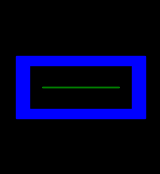

In [21]:
poly_a = structure_a.get_slice(3.5)
poly_b = structure_b.get_slice(3.5)
ax = plot_ab(poly_a, poly_b, add_axis=False)

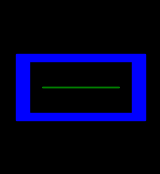

In [22]:
poly_a = structure_a.get_slice(3.0)
poly_b = structure_b.get_slice(3.0)
ax = plot_ab(poly_a, poly_b, add_axis=False)

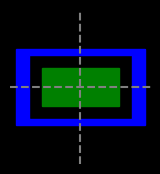

In [23]:
poly_a = structure_a.get_slice(0.0)
poly_b = structure_b.get_slice(0.0)
ax = plot_ab(poly_a, poly_b)

In [24]:
structure_a.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
29,1,-6.5,None,True,True,530,1A,"(1, -6.5, 530)"
0,1,-6.0,None,False,False,501,1A,"(1, -6.0, 501)"
25,1,-5.5,Closed,True,True,526,1B,"(1, -5.5, 526)"
26,1,-5.5,None,True,False,527,1A,"(1, -5.5, 527)"
1,1,-5.0,None,False,False,502,1A,"(1, -5.0, 502)"
2,1,-5.0,Closed,False,False,503,1B,"(1, -5.0, 503)"
3,1,-4.0,None,False,False,504,1A,"(1, -4.0, 504)"
4,1,-4.0,Closed,False,False,505,1B,"(1, -4.0, 505)"
30,1,-3.5,None,True,False,546,1A,"(1, -3.5, 546)"
31,1,-3.5,Closed,True,False,547,1B,"(1, -3.5, 547)"


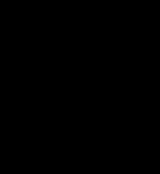

In [25]:
poly_a = structure_a.get_slice(4)
poly_b = structure_b.get_slice(4)
ax = plot_ab(poly_a, poly_b, add_axis=False)

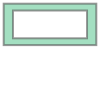

In [26]:
list(poly_a.regions.values())[0]

In [27]:
structure_b.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
7,2,-3.5,None,True,True,538,2A,"(2, -3.5, 538)"
0,2,-3.0,None,False,False,531,2A,"(2, -3.0, 531)"
1,2,-2.0,None,False,False,532,2A,"(2, -2.0, 532)"
2,2,-1.0,None,False,False,533,2A,"(2, -1.0, 533)"
3,2,0.0,None,False,False,534,2A,"(2, 0.0, 534)"
4,2,1.0,None,False,False,535,2A,"(2, 1.0, 535)"
5,2,2.0,None,False,False,536,2A,"(2, 2.0, 536)"
6,2,3.0,None,False,False,537,2A,"(2, 3.0, 537)"
8,2,3.5,None,True,True,539,2A,"(2, 3.5, 539)"


In [28]:
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Sphere in Shell
- Hollow sphere with the second structure as an inner sphere.

![Sphere in Shell](<../../Images/FreeCAD Images/Sphere in Shell.png>)

In [29]:
def sphere_in_shell_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole10 + sphere6
    return slice_data


In [30]:
slice_data = sphere_in_shell_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)


Relationship: Surrounds


#### Sphere in Cylinder in Box
![alt text](<../../Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [31]:
def surrounds_sphere_in_cylinders_in_box_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=10, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = body + cube6 + left_cylinder + right_cylinder + right_sphere
    return slice_data

In [32]:
slice_data = surrounds_sphere_in_cylinders_in_box_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


## Shelters
<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Shelters</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="../../Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>

- Surrounds geometry with hole opened to exterior


In [33]:
def shelters_open_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=8,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [34]:
slice_data = shelters_open_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


In [35]:
def shelters_horizontal_cylinder_single_side_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                              spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=4, length=8,
                                             offset_x=1, offset_z=0,
                                             spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3,
                                                   length=6, offset_x=1,
                                                   spacing=slice_spacing)

    # combine the contours
    slice_data = outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [36]:
slice_data = shelters_horizontal_cylinder_single_side_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Horizontal Sheltered Cylinder
- Cylindrical shell with an interior cylinder ending inside the outer cylinder

![Sheltered Horizontal cylinder](<../../Images/FreeCAD Images/Sheltered Horizontal cylinder.png>)

In [37]:
def shelters_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [38]:
slice_data = shelters_horizontal_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Simple Sheltered Vertical Cylinder
- Hollow cylindrical shell with an interior cylinder ending inside the shell

![Sheltered cylinder](<../../Images/FreeCAD Images/Sheltered cylinder.png>)

In [39]:
def shelters_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


**Currently identified as _Surrounds_**

In [40]:
slice_data = shelters_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

Relationship: Shelters


#### Sphere in Cylinder in Box
![alt text](<../../Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [41]:
def shelters_sphere_in_cylinders_in_box_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=12, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=8, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = body + cube6 + left_cylinder + right_cylinder + right_sphere
    return slice_data

In [42]:
slice_data = shelters_sphere_in_cylinders_in_box_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


## Disjoint

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/disjoint.png" alt="Disjoint" style="width: 200px">
</td></tr></table>

#### Disjoint Boxes
![Disjoint Boxes](<../../Images/FreeCAD Images/Disjoint Boxes.png>)

In [43]:
def disjoint_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-3,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=3,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = left_cube + right_cube + body
    return slice_data

In [44]:
slice_data = disjoint_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Extended Inner Cylinder
- Concentric hollow cylinder with an interior cylinder extending beyond the outer cylinder's hole by one slice

![Extended Inner Cylinder](<../../Images/FreeCAD Images/Extended Inner cylinder.png>)

In [45]:
def extended_inner_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=12,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + inner_cylinder
    return slice_data


In [46]:
slice_data = extended_inner_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Horizontal Disjoint Cylinders
- Same as above but with horizontal cylinders
- Cylindrical shell with an interior cylinder ending outside the larger 
    diameter cylinder
- The relationship is **Disjoint** because the Second cylinder extends beyond 
    the horizontal bounds of the First Structure, but doe not intersect the 
    First Structure.

In [47]:
def disjoint_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                              spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=10,
                                             spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3,
                                                   length=12,
                                                   spacing=slice_spacing)
    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [48]:
slice_data = disjoint_horizontal_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Disjoint Parallel Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is parallel, but **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure, but doe not intersect the First Structure.

![Disjoint Parallel Cylinders](<../../Images/FreeCAD Images/Disjoint Parallel Cylinders.png>)

In [49]:
def parallel_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=25, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_x=10, spacing=slice_spacing)
    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + inner_cylinder + disjoint_cylinder
    return slice_data


In [50]:
slice_data = parallel_disjoint_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Disjoint Axial Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is on the same axis as the first, but above, making it **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure.

![Disjoint Parallel Cylinders](<../../Images/FreeCAD Images/Disjoint Axial Cylinders.png>)

In [51]:
def axial_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=30, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_z=12, spacing=slice_spacing)
    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + inner_cylinder + disjoint_cylinder
    return slice_data


In [52]:
slice_data = axial_disjoint_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Disjoint Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

![Disjoint Concentric Cylinders](<../../Images/FreeCAD Images/Disjoint Concentric Cylinders.png>)


In [53]:
def disjoint_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder 2 slices above primary cylinder
    upper_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=7,
                                             spacing=slice_spacing)
    # cylinder 2 slices below primary cylinder
    lower_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-7,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + upper_cylinder1 + lower_cylinder2
    return slice_data


In [54]:
slice_data = disjoint_concentric_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/borders.png" alt="Borders">
<img src="../../Images/Relationships/Concave Borders.png" alt="Concave Borders">
</td></tr></table>

#### Bordering Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

![Bordering Concentric Cylinders](<../../Images/FreeCAD Images/Bordering  Concentric Cylinders.png>)

In [55]:
def bordering_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=6,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-6,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + bordering_cylinder1 + bordering_cylinder2
    return slice_data


In [56]:
slice_data = bordering_concentric_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


#### Bordering Lateral Boxes
- Cubes with 'x' faces touching.

![Bordering Lateral Boxes](<../../Images/FreeCAD Images/Bordering Boxes.png>)


In [57]:
def lateral_borders_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-1,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=1,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = left_cube + right_cube + body
    return slice_data

In [58]:
slice_data = lateral_borders_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


#### Bordering Lateral Boxes With Disjoint Box
- Cubes with one touching and one disjoint.

![Bordering Lateral Boxes With Disjoint Box](<../../Images/FreeCAD Images/Bordering Boxes With Disjoint Box.png>)


In [59]:
def lateral_borders_two_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-1,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=1,
                         spacing=slice_spacing)
    disjoint_cube = make_box(roi_num=2, width=2, offset_x=-2,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = left_cube + right_cube + body
    return slice_data

In [60]:
slice_data = lateral_borders_two_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


### Bordering Concentric Cylinder SUP Offset
  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP cylinders with single slice gap at the SUP boundary of the central cylinder.

      
![Bordering Concentric Cylinder SUP Offset](<../../Images/FreeCAD Images/Bordering Concentric Cylinder SUP Offset.png>)
![Exterior Border SUP](../../Images/Boundaries/ExteriorBorders2D_SUP.png)

In [61]:
def concentric_cylinders_sup_offset_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=0.2, length=0.4,
                                              offset_z=-0.5,
                                              spacing=slice_spacing)
    sup_cylinder = make_vertical_cylinder(roi_num=2, radius=0.2, length=0.4,
                                          offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + sup_cylinder
    return slice_data


In [62]:
slice_data = concentric_cylinders_sup_offset_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


## Confines (Interior Borders) 

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Confines</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of 
<span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.

For Interior Borders <span class="b">b</span> 
Should be Within <span class="a">a</span>.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/confines.png" alt="Confines">
<img src="../../Images/Relationships/confines with island.png" alt="Confines With Island">
</td></tr></table>

### Confines Box embedded in Box

![Box embedded in Box](<../../Images/FreeCAD Images/Confines Bordering Boxes.png>)

In [63]:
def confined_bordering_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box4 = make_box(roi_num=2, width=4,  spacing=slice_spacing)

    # combine the contours
    slice_data = body + box6 + hole4 + Box4
    return slice_data


In [64]:
slice_data = confined_bordering_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Cylinders

![Confines cylinder](../../FreeCAD_Scripts/confines_cylinder.png)

In [65]:
def confines_cylinder_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.2,
                                    spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5,
                                                length=0.8,
                                                spacing=slice_spacing)
    left_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                        offset_x=-2.5, spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                        offset_x=2.5, spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                length=0.6, offset_x=2.5,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = body + confines_cylinder + primary_cylinder + left_hole + right_hole
    return slice_data


In [66]:
slice_data = confines_cylinder_example()


In [67]:
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Surrounds


AssertionError: 

In [68]:
#logging.getLogger('structure_set').setLevel(logging.DEBUG)
logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
logging.getLogger('structure_set').setLevel(logging.INFO)
#logging.getLogger('contour_graph').setLevel(logging.INFO)

DEBUG:contour_graph:Building contour graph for ROI: 0
DEBUG:contour_graph:Found 2 boundary contours to interpolate.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -0.6
DEBUG:contour_graph:Using gap: 0.10 to create interpolated slice: -0.70
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 0.6
DEBUG:contour_graph:Using gap: -0.10 to create interpolated slice:  0.70
DEBUG:contour_graph:Building contour graph for ROI: 1
DEBUG:contour_graph:Found 6 boundary contours to interpolate.
DEBUG:contour_graph:Generating interpolated contour for ROI: 1 from slice: 0.3
DEBUG:contour_graph:Using slice:  0.40 for interpolation.
DEBUG:contour_graph:Generating interpolated contour for ROI: 1 from slice: 0.3
DEBUG:contour_graph:Generating interpolated contour for ROI: 1 from slice: 0.3
DEBUG:contour_graph:Using slice:  0.40 for interpolation.
DEBUG:contour_graph:Generating interpolated contour for ROI: 1 from slice: 0.3
DEBUG:contour_graph:Generating i

# ERROR: When structures have interleaved slices interpolation does not work.


In [ ]:
def irregular_slices_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=4,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=3,
                                              spacing=slice_spacing)
    left_hole = make_vertical_cylinder(roi_num=1, radius=2, length=3,
                                       offset_x=-2.5, spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=3,
                                        offset_x=2.5, spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                               offset_x=2.5,
                                               spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + confines_cylinder  # + left_hole + right_hole
    return slice_data
slice_data = irregular_slices_example()
logging.getLogger('structure_set').setLevel(logging.DEBUG)
logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
logging.getLogger('structure_set').setLevel(logging.INFO)
logging.getLogger('contour_graph').setLevel(logging.INFO)

DEBUG:structure_set:Building structure for ROI: 0
DEBUG:contour_graph:Building contour graph for ROI: 0
DEBUG:contour_graph:Found 0 boundary contours to interpolate.
DEBUG:structure_set:Slice sequence after ROI 0:
           ThisSlice  NextSlice  PreviousSlice  Original
ThisSlice                                               
-2.0            -2.0       -1.5            NaN      True
-1.5            -1.5       -1.0           -2.0      True
-1.0            -1.0       -0.5           -1.5      True
-0.5            -0.5        0.0           -1.0      True
 0.0             0.0        0.5           -0.5      True
 0.5             0.5        1.0            0.0      True
 1.0             1.0        1.5            0.5      True
 1.5             1.5        2.0            1.0      True
 2.0             2.0        NaN            1.5      True
DEBUG:structure_set:Building structure for ROI: 1
DEBUG:contour_graph:Building contour graph for ROI: 1
DEBUG:contour_graph:Found 0 boundary contours to interp

## Using just ROI 0

(**slice_data = body**)

- DEBUG:contour_graph:Building contour graph for ROI: 0
- DEBUG:contour_graph:**Found 2 boundary contours to interpolate.**
- DEBUG:contour_graph:Generating interpolated contour for **ROI: 0 from slice: -0.6**

- *DEBUG:contour_graph:`Using gap: 0.10 to create interpolated slice: -0.70`*
> **The above gap is not actually being used.**

- DEBUG:contour_graph:Generating interpolated contour for **ROI: 0 from slice: 0.6**
- *DEBUG:contour_graph:Using gap: -0.10 to create interpolated slice:  0.70*
- DEBUG:structure_set:Slice sequence `after ROI 0`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.65    |   -0.65 |    -0.6 |         NaN |  False |
|-0.60    |   -0.60 |    -0.5 |         NaN |   True |
|-0.50    |   -0.50 |    -0.4 |        -0.6 |   True |
|...      |         |         |             |        |
| 0.50    |    0.50 |     0.6 |         0.4 |   True |
| 0.60    |    0.60 |     NaN |         0.5 |   True |
| 0.65    |    0.65 |     NaN |         0.6 |  False |

## Using ROI 0 and ROI 2:

(**slice_data = body + confines_cylinder**)

- DEBUG:contour_graph:Building contour graph for ROI: 0
- DEBUG:contour_graph:**Found 2 boundary contours to interpolate.**
- DEBUG:contour_graph:Generating interpolated contour for **ROI: 0 from slice: 0.6**
- DEBUG:contour_graph:*Using gap: -0.10 to create interpolated slice:  0.70*
- DEBUG:contour_graph:Generating interpolated contour for **ROI: 0 from slice: -0.6**
- DEBUG:contour_graph:*Using gap: 0.10 to create interpolated slice: -0.70*
- DEBUG:structure_set:Slice sequence `after ROI 0`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.65    |   -0.65 |    -0.6 |         NaN |  False |
|-0.60    |   -0.60 |    -0.5 |         NaN |   True |
|...      |         |         |             |        |
| 0.60    |    0.60 |     NaN |         0.5 |   True |
| 0.65    |    0.65 |     NaN |         0.6 |  False |

- DEBUG:contour_graph:Building contour graph for ROI: 2
- DEBUG:contour_graph:**Found 2 boundary contours to interpolate.**
- DEBUG:contour_graph:Generating interpolated contour for **ROI: 2 from slice: 0.3**
- DEBUG:contour_graph:*Using slice:  0.40 for interpolation.*
- DEBUG:contour_graph:Generating interpolated contour for **ROI: 2 from slice: -0.3**
- DEBUG:contour_graph:*Using slice: -0.40 for interpolation.*
- DEBUG:structure_set:Slice sequence `after ROI 2`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.65    |   -0.65 |    -0.6 |         NaN |  False |
|-0.60    |   -0.60 |    -0.5 |         NaN |   True |
|-0.50    |   -0.50 |    -0.4 |        -0.6 |   True |
|-0.40    |   -0.40 |    -0.3 |        -0.5 |   True |
|-0.35    |   -0.35 |    -0.3 |        -0.4 |  False |
|-0.30    |   -0.30 |    -0.2 |        -0.4 |   True |
|...      |         |         |             |        |
| 0.30    |    0.30 |     0.4 |         0.2 |   True |
| 0.35    |    0.35 |     0.4 |         0.3 |  False |
| 0.40    |    0.40 |     0.5 |         0.3 |   True |
| 0.50    |    0.50 |     0.6 |         0.4 |   True |
| 0.60    |    0.60 |     NaN |         0.5 |   True |
| 0.65    |    0.65 |     NaN |         0.6 |  False |


## Using ROI 0, ROI 2 and part of ROI 1:

(**slice_data = body + confines_cylinder + primary_cylinder**)

- DEBUG:contour_graph:Building contour graph for ROI: 0
- DEBUG:contour_graph:Found ***4 boundary contours to interpolate.***
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: 0.6**
- DEBUG:contour_graph:*Using gap: -0.10 to create interpolated slice:  0.70*
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: -0.6**
- DEBUG:contour_graph:*Using gap: 0.10 to create interpolated slice: -0.70*
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: 0.4**
- DEBUG:contour_graph:*Using slice:  0.35 for interpolation.*
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: -0.4**
- DEBUG:contour_graph:*Using slice: -0.35 for interpolation.*
- DEBUG:structure_set:Slice sequence `after ROI 0`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.650   |   -0.650|    -0.6 |         NaN |  False |
|-0.600   |   -0.600|    -0.5 |         NaN |   True |
|-0.500   |   -0.500|    -0.4 |        -0.6 |   True |
|-0.400   |   -0.400|    -0.35|        -0.5 |   True |
|-0.375   |   -0.375|    -0.35|        -0.40|   False|
|-0.350   |   -0.350|    -0.30|        -0.40|**True**|
|-0.300   |   -0.300|    -0.25|        -0.35|   True |
|...      |         |         |             |        |
| 0.300   |    0.300|     0.35|         0.25|   True |
| 0.350   |    0.350|     0.40|         0.30|**True**|
| 0.375   |    0.375|     0.40|         0.35|   False|
| 0.400   |    0.400|     0.50|         0.35|   True |
| 0.500   |    0.500|     0.60|         0.40|   True |
| 0.600   |    0.600|     NaN |         0.50|   True |
| 0.650   |    0.650|     NaN |         0.60|   False|

- DEBUG:structure_set:Building structure for ROI: 1
- DEBUG:contour_graph:Building contour graph for ROI: 1
- DEBUG:contour_graph:**Found 0 boundary contours to interpolate.**
- DEBUG:structure_set:Slice sequence `after ROI 1`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.650   |   -0.650|    -0.6 |         NaN |  False |
|-0.600   |   -0.600|    -0.5 |         NaN |   True |
|-0.500   |   -0.500|    -0.4 |        -0.6 |   True |
|-0.400   |   -0.400|    -0.35|        -0.5 |   True |
|-0.375   |   -0.375|    -0.35|        -0.40|   False|
|-0.350   |   -0.350|    -0.30|        -0.40|**True**|
|-0.300   |   -0.300|    -0.25|        -0.35|   True |
|...      |         |         |             |        |
| 0.300   |    0.300|     0.35|         0.25|   True |
| 0.350   |    0.350|     0.40|         0.30|**True**|
| 0.375   |    0.375|     0.40|         0.35|   False|
| 0.400   |    0.400|     0.50|         0.35|   True |
| 0.500   |    0.500|     0.60|         0.40|   True |
| 0.600   |    0.600|     NaN |         0.50|   True |
| 0.650   |    0.650|     NaN |         0.60|   False|

- DEBUG:contour_graph:Building contour graph for ROI: 2
- DEBUG:contour_graph:**Found 0 boundary contours to interpolate.**
- DEBUG:structure_set:Slice sequence `after ROI 2`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.650   |  -0.650 |   -0.60 |         NaN |  False |
|-0.600   |  -0.600 |   -0.50 |         NaN |   True |
|-0.500   |  -0.500 |   -0.40 |       -0.60 |   True |
|-0.400   |  -0.400 |   -0.35 |       -0.50 |   True |
|-0.375   |  -0.375 |   -0.35 |       -0.40 |  False |
|-0.350   |  -0.350 |   -0.30 |       -0.40 |   True |
|-0.300   |  -0.300 |   -0.25 |       -0.35 |   True |
|...      |         |         |             |        |
| 0.300   |   0.300 |    0.35 |        0.25 |   True |
| 0.350   |   0.350 |    0.40 |        0.30 |   True |
| 0.375   |   0.375 |    0.40 |        0.35 |  False |
| 0.400   |   0.400 |    0.50 |        0.35 |   True |
| 0.500   |   0.500 |    0.60 |        0.40 |   True |
| 0.600   |   0.600 |     NaN |        0.50 |   True |
| 0.650   |   0.650 |     NaN |        0.60 |  False |

## Using ROI 0 and part of ROI 1:

(**slice_data = body + primary_cylinder**)

- DEBUG:contour_graph:Building contour graph for ROI: 0
- DEBUG:contour_graph:**Found 4 boundary contours to interpolate.**
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: -0.4**
- DEBUG:contour_graph:*Using slice: -0.35 for interpolation.*
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: 0.6**
- DEBUG:contour_graph:*Using gap: -0.10 to create interpolated slice:  0.70*
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: -0.6**
- DEBUG:contour_graph:*Using gap: 0.10 to create interpolated slice: -0.70*
- DEBUG:contour_graph:Generating interpolated contour **for ROI: 0 from slice: 0.4**
- DEBUG:contour_graph:*Using slice:  0.35 for interpolation.*
- DEBUG:structure_set:Slice sequence `after ROI 0`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.650   |  -0.650 |   -0.60 |         NaN |  False |
|-0.600   |  -0.600 |   -0.50 |         NaN |   True |
|-0.500   |  -0.500 |   -0.40 |       -0.60 |   True |
|-0.400   |  -0.400 |   -0.35 |       -0.50 |   True |
|-0.375   |  -0.375 |   -0.35 |       -0.40 |  False |
|-0.350   |  -0.350 |   -0.30 |       -0.40 |   True |
|-0.300   |  -0.300 |   -0.25 |       -0.35 |   True |
|...      |         |         |             |        |
| 0.300   |   0.300 |    0.35 |        0.25 |   True |
| 0.350   |   0.350 |    0.40 |        0.30 |   True |
| 0.375   |   0.375 |    0.40 |        0.35 |  False |
| 0.400   |   0.400 |    0.50 |        0.35 |   True |
| 0.500   |   0.500 |    0.60 |        0.40 |   True |
| 0.600   |   0.600 |     NaN |        0.50 |   True |
| 0.650   |   0.650 |     NaN |        0.60 |  False |

- DEBUG:contour_graph:Building contour graph for ROI: 1
- DEBUG:contour_graph:**Found 0 boundary contours to interpolate.**
- DEBUG:structure_set:Slice sequence `after ROI 1`:

|ThisSlice|ThisSlice|NextSlice|PreviousSlice|Original|
|---------|---------|---------|-------------|--------|
|-0.650   |  -0.650 |   -0.60 |         NaN |  False |
|-0.600   |  -0.600 |   -0.50 |         NaN |   True |
|-0.500   |  -0.500 |   -0.40 |       -0.60 |   True |
|-0.400   |  -0.400 |   -0.35 |       -0.50 |   True |
|-0.375   |  -0.375 |   -0.35 |       -0.40 |  False |
|-0.350   |  -0.350 |   -0.30 |       -0.40 |   True |
|-0.300   |  -0.300 |   -0.25 |       -0.35 |   True |
|...      |         |         |             |        |
| 0.300   |   0.300 |    0.35 |        0.25 |   True |
| 0.350   |   0.350 |    0.40 |        0.30 |   True |
| 0.375   |   0.375 |    0.40 |        0.35 |  False |
| 0.400   |   0.400 |    0.50 |        0.35 |   True |
| 0.500   |   0.500 |    0.60 |        0.40 |   True |
| 0.600   |   0.600 |     NaN |        0.50 |   True |
| 0.650   |   0.650 |     NaN |        0.60 |  False |

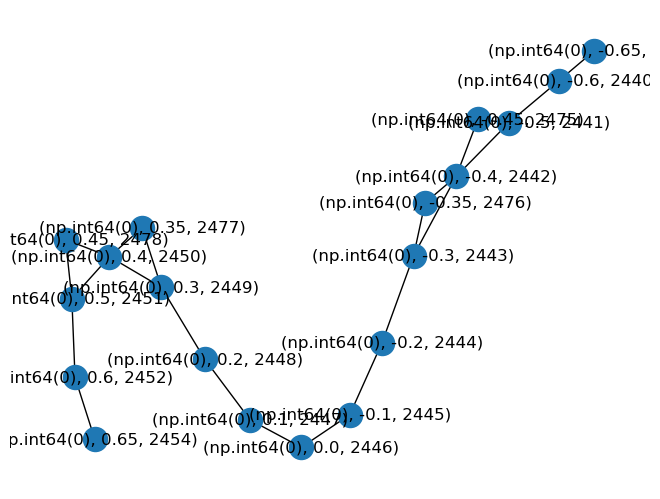

In [ ]:
contour_graph = structures.structures[0].contour_graph
nx.draw(
    contour_graph,
    with_labels=True,
   # pos=nx.arf_layout(contour_graph)
    )
plt.show()

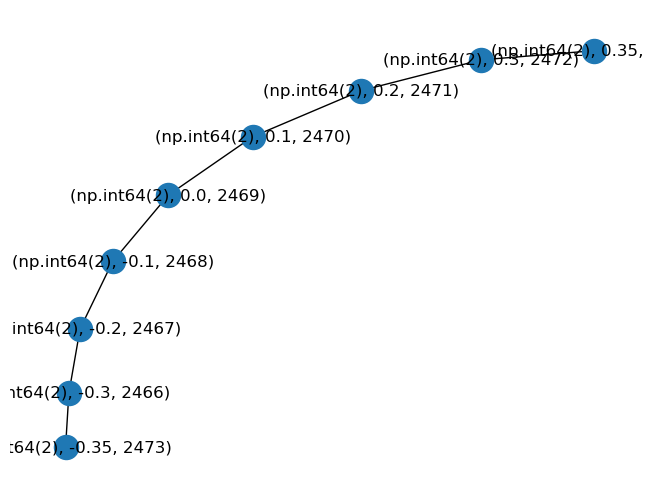

In [ ]:
contour_graph = structures.structures[2].contour_graph
nx.draw(
    contour_graph,
    with_labels=True,
   # pos=nx.arf_layout(contour_graph)
    )
plt.show()

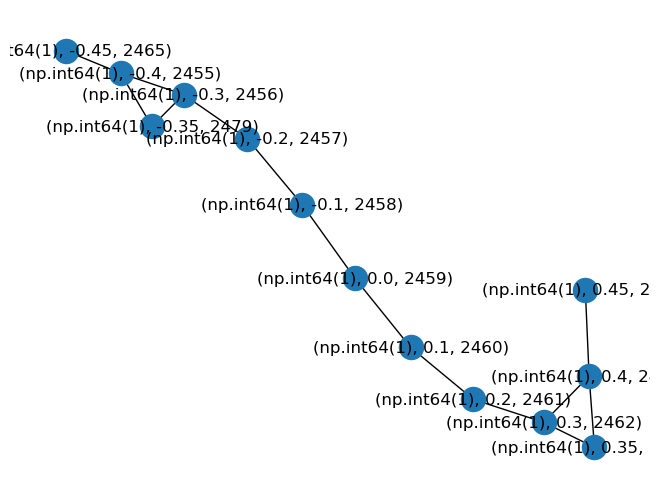

In [ ]:
contour_graph = structures.structures[1].contour_graph
nx.draw(
    contour_graph,
    with_labels=True,
   # pos=nx.arf_layout(contour_graph)
    )
plt.show()

# ERROR only ROI 0 is referenced
- This is likely a labeling error because boundary slices for other ROIs are generated.
# ERROR slice 0.30 is used for interpolation.
- Should not be referencing 0.30, should be using gap for 0.35 and -0.35
# ERROR gap should be 0.05 not 0.1
- distance between slices should be divided by 2

In [ ]:
logging.getLogger('structures').setLevel(logging.DEBUG)

relation = structure_a.relate(structure_b)

logging.getLogger('structures').setLevel(logging.INFO)


DEBUG:structures:SliceIndex: -0.45,
RelationType: Relationship: Unknown
Relation:
|001|	|001|	|001|
|001|	|001|	|001|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: -0.4,
RelationType: Relationship: Unknown
Relation:
|001|	|001|	|001|
|001|	|001|	|001|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: -0.35,
RelationType: Relationship: Unknown
Relation:
|001|	|000|	|000|
|001|	|000|	|000|
|011|	|000|	|000|


DEBUG:structures:SliceIndex: -0.3,
RelationType: Relationship: Surrounds
Relation:
|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|


DEBUG:structures:SliceIndex: -0.2,
RelationType: Relationship: Surrounds
Relation:
|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|


DEBUG:structures:SliceIndex: -0.1,
RelationType: Relationship: Surrounds
Relation:
|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|


DEBUG:structures:SliceIndex: 0.0,
RelationType: Relationship: Surrounds
Relation:
|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|


DEBUG:structures:SliceIndex: 0.1

In [ ]:

print(relation)

|111|	|111|	|111|
|001|	|001|	|001|
|001|	|001|	|001|



    RelationshipTest(RelationshipType.CONFINES,
                        0b100010000101000100000000000,
                        0b000010000101000000000000000),
```
MASK:
|100| |101| |000|
|010| |000| |000|
|000| |100| |000|

VALUES:
|000| |101| |000|
|010| |000| |000|
|000| |000| |000|



```
DEBUG:structures:SliceIndex: -0.35,
RelationType: Relationship: Unknown
Relation:
|001|	|000|	|000|
|001|	|000|	|000|
|011|	|000|	|000|


DEBUG:structures:SliceIndex: -0.3,
RelationType: Relationship: Surrounds
Relation:
|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|


...


DEBUG:structures:SliceIndex: 0.35,
RelationType: Relationship: Unknown
Relation:
|001|	|000|	|000|
|001|	|000|	|000|
|011|	|000|	|000|


DEBUG:structures:SliceIndex: 0.4,
RelationType: Relationship: Unknown
Relation:
|001|	|001|	|001|
|001|	|001|	|001|
|001|	|001|	|001|


In [ ]:
structure_b.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
0,2,-0.3,None,False,False,2368,2A,"(2, -0.3, 2368)"
1,2,-0.2,None,False,False,2369,2B,"(2, -0.2, 2369)"
2,2,-0.1,None,False,False,2370,2C,"(2, -0.1, 2370)"
3,2,0.0,None,False,False,2371,2D,"(2, 0.0, 2371)"
4,2,0.1,None,False,False,2372,2E,"(2, 0.1, 2372)"
5,2,0.2,None,False,False,2373,2F,"(2, 0.2, 2373)"
6,2,0.3,None,False,False,2374,2G,"(2, 0.3, 2374)"


# ERROR: No Interpolated slices for ROI 2

In [ ]:
structure_a.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
0,1,-0.350,None,False,False,2346,1A,"(1, -0.35, 2346)"
22,1,-0.325,None,True,False,2375,1A,"(1, -0.325, 2375)"
23,1,-0.325,None,True,False,2376,1A,"(1, -0.325, 2376)"
1,1,-0.300,None,False,False,2347,1A,"(1, -0.3, 2347)"
2,1,-0.300,None,False,False,2348,1A,"(1, -0.3, 2348)"
3,1,-0.250,None,False,False,2349,1A,"(1, -0.25, 2349)"
4,1,-0.200,None,False,False,2350,1A,"(1, -0.2, 2350)"
5,1,-0.200,None,False,False,2351,1A,"(1, -0.2, 2351)"
6,1,-0.150,None,False,False,2352,1A,"(1, -0.15, 2352)"
7,1,-0.100,None,False,False,2353,1A,"(1, -0.1, 2353)"


### Confines Embedded Cylinders
  - Primary: Central Cylinder
  - Concentric shorter hole in the center of the primary cylinder
  - Secondary same height as hole but narrower
  - Interior borders at the and bottom of hole.
  
![Confines Embedded Cylinders](<../../Images/FreeCAD Images/Confines Embedded Cylinder.png>)

In [ ]:
def embedded_cylinder_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=4, length=0.8,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    center_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                         offset_z=-0.2, spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.6,
                                             offset_z=-0.2,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + center_hole + middle_cylinder
    return slice_data


In [ ]:
slice_data = embedded_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

### Confines Embedded Spheres
   - concentric shells
   - Sphere within shell with inner island
 
![Confines Embedded Spheres](<../../Images/FreeCAD Images/Confines Embedded Spheres.png>)

In [ ]:
def embedded_spheres_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)

    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)

    sphere10 = make_sphere(roi_num=2, radius=5, spacing=slice_spacing)
    hole8 = make_sphere(roi_num=2, radius=4, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole10 + sphere8 + sphere10 + hole8
    return slice_data


In [ ]:
slice_data = embedded_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

### Confines Box in Box on z surface
 - Box in box, touching z plane hole surface only
 
![Confines Box in Box on z surface](<../../Images/FreeCAD Images/Confines Box in Box on z surface.png>)

In [ ]:
def confined_box_z_border_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box2 = make_box(roi_num=2, width=2, offset_z=1,  spacing=slice_spacing)

    # combine the contours
    slice_data = body + box6 + hole4 + Box2
    return slice_data


In [ ]:
slice_data = confined_box_z_border_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

### Confines Box in Box on Y surface
 - Box in box, touching Y plane hole surface only
 
![Confines Box in Box on Y surface](<../../Images/FreeCAD Images/Confines Box in Box on y surface.png>)

In [ ]:
def confined_box_y_border_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box2 = make_box(roi_num=2, width=2, offset_y=1,  spacing=slice_spacing)

    # combine the contours
    slice_data = body + box6 + hole4 + Box2
    return slice_data


In [ ]:
slice_data = confined_box_y_border_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

## Partition

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Partition</th><th></th></tr>
<td class="d" colspan="2">
The boundaries of <span class="a">a</span> and <span class="b">b</span> have more than one point in common.
No points of <span class="b">b</span> are exterior to <span class="a">a</span>, and some points in <span class="a">a</span> are exterior to <span class="b">b</span>.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/partitions simple.png" alt="Partition">
<img src="../../Images/Relationships/partitions archipelago with island.png" alt="Partition With Island">
<img src="../../Images/Relationships/partitions partial ring.png" alt="Partition Ring">
</td></tr></table>

**Partition**

- half shell

### Partition Box in Box on Y surface
 - Box part of box, touching Y plane surface only
 
![Partition Box in Box on Y surface](<../../Images/FreeCAD Images/Partition Box in Box on y surface.png>)

In [ ]:
def partition_embedded_box_on_y_surface():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    box6_3 = make_box(roi_num=2, width=6, length=3, height=6, offset_y=1.5,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_3 + body
    return slice_data


In [ ]:
slice_data = partition_embedded_box_on_y_surface()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

### Partition Box in Box on Z surface
 - Box part of box, touching Z plane surface only
 
![Partition Box in Box on Z surface](<../../Images/FreeCAD Images/Partition Box in Box on z surface.png>)

In [ ]:
def partition_embedded_box_on_z_surface():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30,
                                  spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    box6_3 = make_box(roi_num=2, width=6, length=6, height=3, offset_z=1.5,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_3 + body
    return slice_data


In [ ]:
slice_data = partition_embedded_box_on_z_surface()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

#### Horizontal Cylinders

![Horizontal Cylinders](../../Images/FreeCAD%20Images/HorizontalCylinders.png)

In [ ]:
def horizontal_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=6, length=6, height=8, offset_z=-4,
                    spacing=slice_spacing)
    cylinder2h = make_horizontal_cylinder(radius=2, length=5, roi_num=1,
                                          spacing=slice_spacing)
    cylinder1h = make_horizontal_cylinder(radius=1, length=5, roi_num=2,
                                          spacing=slice_spacing)
    # combine the contours
    slice_data = body + cylinder1h + cylinder2h
    return slice_data


In [ ]:
slice_data = horizontal_cylinders()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

 #### Vertical Concentric Cylinders
 
 ![Concentric Cylinders](../../Images/FreeCAD%20Images/ConcentricCylinders.png)

In [ ]:
def vertical_concentric_cylinders():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    cylinder6 = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                    spacing=slice_spacing)
    cylinder4 = make_vertical_cylinder(roi_num=2, radius=4, length=10,
                                    spacing=slice_spacing)
    # combine the contours
    slice_data = body + cylinder6 + cylinder4
    return slice_data


In [ ]:
slice_data = vertical_concentric_cylinders()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

#### Concentric cylinders starting on the same slice
  
<img src="../../Images\Boundaries\PartitionSup3D.png" alt="PartitionSup3D" style="height:50px;">
<img src="../../Images\Boundaries\PartitionSup2D.png" alt="PartitionSup2D" style="height:30px;">

In [ ]:
def concentric_cylinders_same_start():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    # Concentric cylinders starting on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=7,
                                              offset_z=-3.5,
                                              spacing=slice_spacing)
    sup_partition = make_vertical_cylinder(roi_num=2, radius=1, length=3.0,
                                           offset_z=-1.5,
                                           spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + sup_partition
    return slice_data


In [ ]:
slice_data = concentric_cylinders_same_start()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

#### Concentric cylinders ending on the same slice.

<img src="../../Images\Boundaries\PartitionInf3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="../../Images\Boundaries\PartitionInf2D.png" alt="PartitionInf2D" style="height:30px;">

In [ ]:
def concentric_cylinders_same_end():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=10,
                                  spacing=slice_spacing)
    # Concentric cylinders ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=7.0,
                                              offset_z=3.5,
                                              spacing=slice_spacing)
    inf_partition = make_vertical_cylinder(roi_num=2, radius=1, length=4,
                                           offset_z=2, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + inf_partition
    return slice_data


In [ ]:
slice_data = concentric_cylinders_same_end()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

#### Concentric cylinders starting and ending on the same slice.

<img src="../../Images\Boundaries\Partition3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="../../Images\Boundaries\Partition2D.png" alt="PartitionInf2D" style="height:30px;">

In [ ]:
def concentric_cylinders_same_start_end():
    slice_spacing = 0.05
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    # Concentric cylinders starting and ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=0.0,
                                              spacing=slice_spacing)
    mid_partition = make_vertical_cylinder(roi_num=2, radius=1, length=0.7,
                                           offset_z=-0.0, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + mid_partition
    return slice_data


In [ ]:
slice_data = concentric_cylinders_same_start_end()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

### Partition Sphere Island
   - concentric shells
   - 2nd structure matches inner island
 
![Partition Sphere Island](<../../Images/FreeCAD Images/Partition Sphere Island.png>)

In [ ]:
def partition_sphere_island_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)

    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere4 = make_sphere(roi_num=1, radius=2, spacing=slice_spacing)

    sphere4_2 = make_sphere(roi_num=2, radius=2, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole8 + sphere4 + sphere4_2
    return slice_data


In [ ]:
slice_data = partition_sphere_island_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

## Overlaps

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Overlaps</th><th>Symmetric</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have some but not all points in common.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/overlaps simple.png" alt="Overlaps">
<img src="../../Images/Relationships/overlaps ring.png" alt="Overlaps With Ring">
<img src="../../Images/Relationships/overlaps surounded.png" alt="Overlaps Surrounded">
<img src="../../Images/Relationships/overlaps ring surrounds simple.png" alt="Ring Overlaps Simple">
<img src="../../Images/Relationships/archipelago contains simple.png" alt="Ring Overlaps Simple">
</td></tr></table>

### Overlapping Spheres 

![Overlapping Spheres](<../../Images/FreeCAD Images/Overlapping Spheres.png>)

In [ ]:
def overlapping_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=10,
                                  spacing=slice_spacing)

    right_sphere6 = make_sphere(roi_num=1, radius=6, offset_x=-2,
                                spacing=slice_spacing)
    left_sphere6 = make_sphere(roi_num=2, radius=6, offset_x=2,
                                spacing=slice_spacing)

    # combine the contours
    slice_data = body + right_sphere6 + left_sphere6
    return slice_data


In [ ]:
slice_data = overlapping_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

### Overlapping Boxes in the Y Direction 

![Overlapping Boxes in the Y Direction](<../../Images/FreeCAD Images/Overlapping Boxes in Y direction.png>)

In [ ]:
def overlapping_boxes_y():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_y=0.2,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_y + body
    return slice_data


In [ ]:
slice_data = overlapping_boxes_y()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

### Overlapping Boxes in the Z Direction 

![Overlapping Boxes in the Z Direction](<../../Images/FreeCAD Images/Overlapping Boxes in Z direction.png>)

In [ ]:
def overlapping_boxes_z():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_z=0.3,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_y + body
    return slice_data


In [ ]:
slice_data = overlapping_boxes_z()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

### Stacked Boxes

![Stacked Boxes](<../../Images/FreeCAD Images/Stacked Boxes.png>)

In [ ]:
def stacked_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_z=0.6,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_y + body
    return slice_data

In [ ]:
slice_data = stacked_boxes()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

### Overlapping Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

- Cylinders are overlapping because they have a contour on the same slices (-0.4, and 0.4).

![Overlapping Concentric Cylinders](<../../Images/FreeCAD Images/Overlapping Concentric Cylinders.png>)


In [ ]:
def overlapping_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder overlapping primary cylinder
    overlapping_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=5,
                                             spacing=slice_spacing)
    # cylinder overlapping primary cylinder
    overlapping_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-5,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + overlapping_cylinder1 + overlapping_cylinder2
    return slice_data


In [ ]:
slice_data = overlapping_concentric_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

### Overlapping Cubes INF RT

![Overlapping Cubes INF RT](<../../Images/FreeCAD Images/Overlapping Cubes INF RT.png>)

In [ ]:
def overlapping_cubes_inf_rt():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf_rt = make_box(roi_num=2, width=6, offset_z=3, offset_x=3,
                            offset_y=3, spacing=slice_spacing)
    # combine the contours
    slice_data = body + cube6 + cube6_inf_rt
    return slice_data


In [ ]:
slice_data = overlapping_cubes_inf_rt()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

### Overlapping Extended Cylinder

![Overlapping Extended Cylinder](<../../Images/FreeCAD Images/Overlapping Extended Cylinder.png>)

In [ ]:
def overlapping_extended_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              spacing=slice_spacing)
    # cylinder with interior borders
    overlapping_cylinder = make_vertical_cylinder(roi_num=2, radius=3,
                                                  length=0.9,
                                                  spacing=slice_spacing)

    # combine the contours
    slice_data = body + primary_cylinder + overlapping_cylinder
    return slice_data


In [ ]:
slice_data = overlapping_extended_cylinder()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

## Equals

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Equals</th><th>Symmetric, Transitive</th></tr>
<td class="d" colspan="2">
The interiors of <span class="a">a</span> and <span class="b">b</span> 
intersect and no part of the interior of one geometry intersects the exterior of the other.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/equals.png" alt="Equals">
</td></tr></table>

### Equal Spheres 


In [ ]:
def equal_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=10,
                                  spacing=slice_spacing)

    a_sphere6 = make_sphere(roi_num=1, radius=6,
                                spacing=slice_spacing)
    b_sphere6 = make_sphere(roi_num=2, radius=6,
                                spacing=slice_spacing)

    # combine the contours
    slice_data = body + a_sphere6 + b_sphere6
    return slice_data


In [ ]:
slice_data = equal_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

### Equal Boxes 


In [ ]:
def equal_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    a_box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    b_box6 = make_box(roi_num=2, width=0.6, spacing=slice_spacing)
    # combine the contours
    slice_data = a_box6 + b_box6 + body
    return slice_data


In [ ]:
slice_data = equal_boxes()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

# Done To Here

### Equal box created by cropping a larger box.

In [ ]:
def equal_boxes_by_crop():
    def apply_crop(p):
        # polygon made from offset boxed resulting in a 4x4 square hole in the
        # middle.
        left_xy_points = box_points(width=0.8, offset_x=0.6, offset_y=0)
        left_crop = shapely.Polygon(left_xy_points)
        right_xy_points = box_points(width=0.8, offset_x=-0.6, offset_y=0)
        right_crop = shapely.Polygon(right_xy_points)
        up_xy_points = box_points(width=0.8, offset_x=0, offset_y=0.6)
        up_crop = shapely.Polygon(up_xy_points)
        down_xy_points = box_points(width=0.8, offset_x=0, offset_y=-0.6)
        down_crop = shapely.Polygon(down_xy_points)
        crop_poly = shapely.union_all([left_crop, right_crop,
                                       up_crop, down_crop])
        cropped = p - crop_poly
        return poly_round(cropped)

    def get_cropped_box(box8):# -> List[Dict[str, Any]]:
        cropped_box = []
        for contour_slice in box8:
            contour = contour_slice['Points']
            poly = shapely.Polygon(contour)
            cropped_poly = apply_crop(poly)
            cropped_coords = list(cropped_poly.boundary.coords)
            cropped_contour = {
                'ROI': contour_slice['ROI'],
                'Slice': contour_slice['Slice'],
                'Points': cropped_coords,
            }
            cropped_box.append(cropped_contour)
        return cropped_box
    slice_spacing = 0.1
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    box8 = make_box(roi_num=1, width=0.8, spacing=slice_spacing)
    box4 = make_box(roi_num=2, width=0.4, spacing=slice_spacing)
    # apply the crop to box8 to create a copy of box4
    cropped_box = get_cropped_box(box8)
    slice_data = box4 + body + cropped_box
    return slice_data


In [ ]:
slice_data = equal_boxes_by_crop()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

# Misc. Debugging Code

In [ ]:
logging.getLogger('structures').setLevel(logging.DEBUG)
relation = structure_a.relate(structure_b)
logging.getLogger('structures').setLevel(logging.INFO)

print(relation)

In [ ]:
relation = structure_a.relate(structure_b)
print(relation)
relation_type = relation.identify_relation()
print(relation_type)

In [ ]:
poly_a = structure_a.get_slice(0.0)
poly_b = structure_b.get_slice(0.0)
ax = plot_ab(poly_a, poly_b, add_axis=False)

In [ ]:
poly_a = structure_a.get_slice(1.0)
poly_b = structure_b.get_slice(1.0)
ax = plot_ab(poly_a, poly_b, add_axis=False)

In [ ]:
poly_a = structure_a.get_slice(1.5)
poly_b = structure_b.get_slice(1.5)
ax = plot_ab(poly_a, poly_b, add_axis=False)

In [ ]:
slice_data = extended_inner_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]

poly_a = structure_a.get_slice(5.5)
poly_b = structure_b.get_slice(5.5)
plot_ab(poly_a, poly_b)
structure_a.relate(structure_b)

In [ ]:
poly_a = structure_a.get_slice(0)
poly_b = structure_b.get_slice(0)
plot_ab(poly_a, poly_b)

In [ ]:
structure_a.contour_lookup

In [ ]:
structure_a.get_contour((1,-5.5,43)).polygon - structure_a.get_contour((1,-5.5,44)).polygon

In [ ]:
structure_a.get_contour((1,-5.0,19)).polygon.bounds

In [ ]:
structure_a.get_contour((1,-5.5,43)).polygon.bounds

## Results from individual slices
```
Slice Index: -6.0 Relationship: Disjoint 
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|

Slice Index: -5.5 Relationship: **Unknown** 
|000|	|000|	|000|
|111|	|000|	|000|
|111|	|000|	|000|

Slice Index: -5.0 Relationship: Shelters 
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

...

Slice Index: 5.0 Relationship: Shelters 
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

Slice Index: 5.5 Relationship: **Unknown** 
|000|	|000|	|000|
|111|	|000|	|000|
|111|	|000|	|000|

Slice Index: 6.0 Relationship: Disjoint 
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|

```

In [ ]:
relation = structure_a.relate(structure_b)
print(relation.identify_relation())

In [ ]:
r = DE27IM(structure_a,structure_b,slice_index=0)
print(r.identify_relation())

In [ ]:
def relation_example(structure_a,structure_b, slice_index):
    poly_a = structure_a.get_contour(slice_index)
    poly_b = structure_b.get_contour(slice_index)

    r = DE27IM(poly_a, poly_b)
    print('Relation Binary', r)
    print('Relationship', r.identify_relation())
    plot_ab(poly_a.contour, poly_b.contour)

In [ ]:
relation_example(structure_a, structure_b,slice_index=0)

In [ ]:
structure_a

In [ ]:
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT